In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [56]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')

In [58]:
df.shape


(9827, 9)

In [60]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [64]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [66]:
# to upar wale Genre column me wide space dikh rahe hai hame use hatane hai
# hame check karana hai ki hamare dataset me koi duplicate value hai kya
df.duplicated().sum()

0

In [68]:
# so there is no duplicate value in our dataset
df.describe() # simple statestics statestics hamesha numeric data pe hota hai

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [70]:
df.isnull().sum().sum()

0

## Exploratory Summary
<ol>
    <li>we have data frame consisting of (9827, 9) 9827 rows and 9 column</li>
    <li>Our dataset looks bit tidy wit no NaN valus nor duplicate values</li>
    <li>Release_date column needs to be casted into date and to exatrct only the year value</li>
    <li>Overview, Original_language and  Poster_URL is not useful during the analysis so we will drop it </li>
    <li>there is noticable Outlier in Popularity column</li>
    <li>VOte_average better be catogarized for proper analysis</li>
    <li>Genre  column has comma seperated values and white spaces that needs to be handled and casted into  catogiry</li>
    
</ol>

## Problem that manager gives:
<ol><li>Which is most frequent genre of movies released non netflix?</li>
<li>Which genre has highest vote ?</li>
<li>Which movie got the high popularity ? What's its genre ?</li>
<li>Which movie got the lowest popularity ? whats its genre ?</li>
<li>Which year has the most filmmed movies?</li></ol>

In [74]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [76]:
# Step 1: Print before conversion
print("Before conversion:")
print(df['Release_Date'].head(10))

Before conversion:
0    2021-12-15
1    2022-03-01
2    2022-02-25
3    2021-11-24
4    2021-12-22
5    2022-01-07
6    2022-01-12
7    2022-02-10
8    2022-02-17
9    2021-11-03
Name: Release_Date, dtype: object


In [78]:
# Step 2: Convert to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [80]:
# Step 3: Print after conversion
print("After datetime conversion:")
print(df['Release_Date'].head(10))

After datetime conversion:
0   2021-12-15
1   2022-03-01
2   2022-02-25
3   2021-11-24
4   2021-12-22
5   2022-01-07
6   2022-01-12
7   2022-02-10
8   2022-02-17
9   2021-11-03
Name: Release_Date, dtype: datetime64[ns]


In [82]:
# Step 4: Extract the year
df['Release_Date'] = df['Release_Date'].dt.year

In [84]:
# Step 5: Final result
print("Final year values:")
print(df['Release_Date'].head(10))

Final year values:
0    2021
1    2022
2    2022
3    2021
4    2021
5    2022
6    2022
7    2022
8    2022
9    2021
Name: Release_Date, dtype: int32


In [86]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### We are Dropping the Overview ,Original_Language and  Poster_Url columns from table

In [90]:
cols=['Overview','Original_Language','Poster_Url']
df.drop(cols, axis=1, inplace=True)  # coloumns ke liye axis=1 hota hai and ham isako permenantly change karana chahate hai hamare table me 
df.columns                  # isiliye inplace=True  likha hai

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [92]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### categorizing  Vote_Average column
we would cut the Vote_Average	column and make four categories :  popular , Averege , below_avg , not_popular to describe it more using categorize_col() function provided in above.

In [99]:
def categorize_col(df,col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col]= pd.cut(df[col],edges , labels=labels, duplicates='drop')
    return df

In [101]:
labels =['not_popular', 'below_avg', 'average','popular']

categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [103]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [107]:
# hame check karana hai ki kitani mivie  popular,not popular , average & below average  hai
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [109]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [111]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


## we would split genres into a list and then explode our dataframe to have only one genre per roe for each movie

In [114]:
df['Genre']=df['Genre'].str.split(', ')

df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [116]:
#casting column to categories
df['Genre']= df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [118]:
df.shape

(25552, 6)

In [120]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [122]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Data Visualization to solve problem

In [125]:
sns.set_style('whitegrid')

## 1.Which is most frequent genre of movies released on netflix?

In [129]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

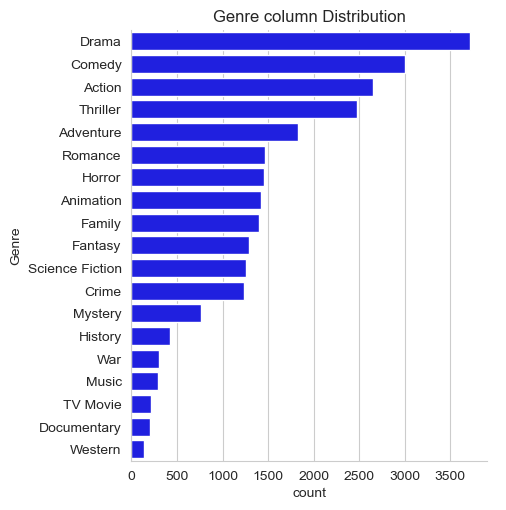

In [133]:
sns.catplot(y='Genre',data=df,kind='count',
            order= df['Genre'].value_counts().index,
            color='blue')

plt.title('Genre column Distribution')
plt.show()

# # 2.Which genre has highest vote ?

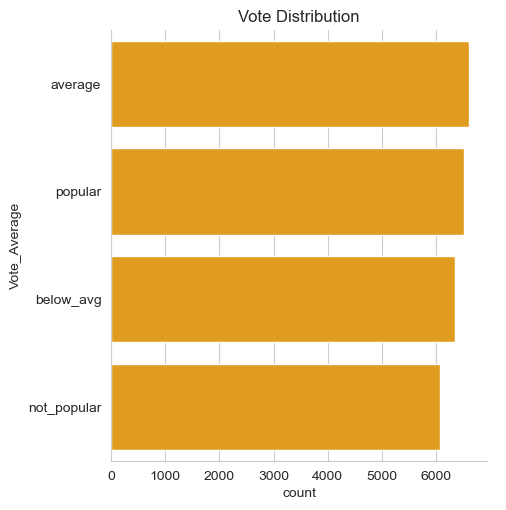

In [138]:
# catplot catogiries ke liye use hota hai
sns.catplot(y='Vote_Average',data=df, kind='count',
           order=df['Vote_Average'].value_counts().index,
            color='orange')
plt.title('Vote Distribution')
plt.show()

# 3.Which movie got the high popularity ? What's its genre ? 

In [145]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# 4.Which movie got the lowest popularity ? whats its genre ?

In [152]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


# 5.Which year has the most filmmed movies?

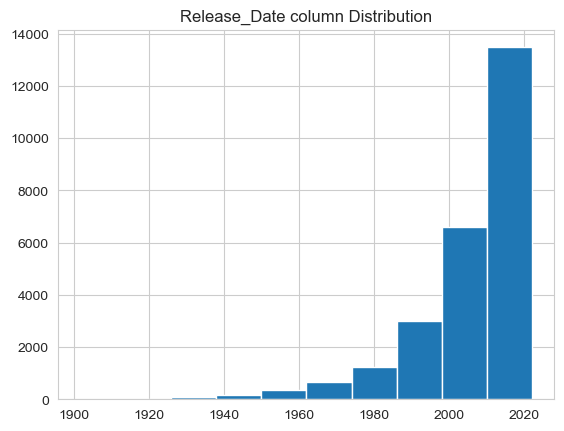

In [161]:
# we use histogram to see the distribution of single variable
df['Release_Date'].hist()
plt.title('Release_Date column Distribution')
plt.show()

# Final Answers:

#### Q1.Which is most frequent genre of movies released on netflix?
Ans: Drama

#### Q2. Which genre has highest vote ?
Ans: Average

#### Q3.Which movie got the high popularity ? What's its genre ?
Ans: Spider-Man: No Way Home and Genre is ("Action","Adventure", "Science Fiction")

#### Q4.Which movie got the lowest popularity ? whats its genre ?
Ans : The United States vs. Billie Holiday and Genre is ("Music","Drama", "History")

#### Q5.Which year has the most filmmed movies?
Ans: 2020